In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
Data=pd.read_csv("project_dataset_2.csv")
Data

,Unnamed: 0,Unnamed: 0.1,file name,1,2,3,4,5,6,7,8,9,10,11,12,label,new label
0,0,0,recording0_0_1_s10_DS_N_T1_P0_D1.wav,7.313038e+13,6.838484e+11,106.939458,74778.967994,-19.468164,0.001515,-3.542204e-08,27283.193308,-1.472818,0.029646,43060.262604,1.019390e+08,0,1
1,1,1,recording0_0_1_s10_DS_N_T1_P0_D3.wav,6.878091e+13,1.935556e+11,355.354774,65220.533125,-18.192720,0.001457,-3.465258e-08,21184.414950,-1.195340,0.026108,38924.236573,8.876523e+07,0,1
2,2,2,recording0_0_1_s10_DS_N_T1_P0_D5.wav,3.415582e+13,8.129583e+10,420.142299,55759.504037,-15.723073,0.001264,-3.012727e-08,17728.956716,-1.008957,0.019576,33174.406531,7.066051e+07,0,1
3,3,3,recording0_0_1_s10_DS_N_T1_P1_D1.wav,8.650639e+13,3.393545e+11,254.914519,80865.624518,-22.257678,0.001773,-4.206380e-08,26938.712105,-1.506833,0.024750,44469.283313,9.017944e+07,0,1
4,4,4,recording0_0_1_s10_DS_N_T1_P1_D3.wav,4.325245e+13,7.296460e+10,592.786800,58541.312589,-16.655801,0.001344,-3.210326e-08,18309.452635,-1.049942,0.026171,34942.623024,7.017204e+07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41467,41467,41467,recording1_90_4_s9_US_W_T2_P1_D3.wav,1.568625e+14,8.807160e+11,178.107884,112438.668891,-30.991097,0.002471,-5.869070e-08,37502.030857,-2.114742,0.033387,47637.729316,1.427486e+08,90,0
41468,41468,41468,recording1_90_4_s9_US_W_T2_P1_D5.wav,1.386150e+14,6.246596e+11,221.904782,96755.845195,-27.019277,0.002165,-5.155841e-08,31490.690745,-1.793311,0.046340,44921.471591,1.226299e+08,90,0
41469,41469,41469,recording1_90_4_s9_US_W_T2_P2_D1.wav,2.667326e+14,1.944109e+12,137.200432,155815.703124,-42.799839,0.003407,-8.083031e-08,52265.695008,-2.944245,0.019534,62124.031725,1.823634e+08,90,0
41470,41470,41470,recording1_90_4_s9_US_W_T2_P2_D3.wav,1.857068e+14,1.267410e+12,146.524676,119605.684753,-32.528907,0.002581,-6.114243e-08,40895.171465,-2.285400,0.030758,51999.127235,1.530861e+08,90,0


# Data Visualization

In [4]:
Data2=Data.iloc[:,3:] #Removing the first 2 columns from the data set as it were just the name and serial numbers of the files.
Data2

,1,2,3,4,5,6,7,8,9,10,11,12,label,new label
0,7.313038e+13,6.838484e+11,106.939458,74778.967994,-19.468164,0.001515,-3.542204e-08,27283.193308,-1.472818,0.029646,43060.262604,1.019390e+08,0,1
1,6.878091e+13,1.935556e+11,355.354774,65220.533125,-18.192720,0.001457,-3.465258e-08,21184.414950,-1.195340,0.026108,38924.236573,8.876523e+07,0,1
2,3.415582e+13,8.129583e+10,420.142299,55759.504037,-15.723073,0.001264,-3.012727e-08,17728.956716,-1.008957,0.019576,33174.406531,7.066051e+07,0,1
3,8.650639e+13,3.393545e+11,254.914519,80865.624518,-22.257678,0.001773,-4.206380e-08,26938.712105,-1.506833,0.024750,44469.283313,9.017944e+07,0,1
4,4.325245e+13,7.296460e+10,592.786800,58541.312589,-16.655801,0.001344,-3.210326e-08,18309.452635,-1.049942,0.026171,34942.623024,7.017204e+07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41467,1.568625e+14,8.807160e+11,178.107884,112438.668891,-30.991097,0.002471,-5.869070e-08,37502.030857,-2.114742,0.033387,47637.729316,1.427486e+08,90,0
41468,1.386150e+14,6.246596e+11,221.904782,96755.845195,-27.019277,0.002165,-5.155841e-08,31490.690745,-1.793311,0.046340,44921.471591,1.226299e+08,90,0
41469,2.667326e+14,1.944109e+12,137.200432,155815.703124,-42.799839,0.003407,-8.083031e-08,52265.695008,-2.944245,0.019534,62124.031725,1.823634e+08,90,0
41470,1.857068e+14,1.267410e+12,146.524676,119605.684753,-32.528907,0.002581,-6.114243e-08,40895.171465,-2.285400,0.030758,51999.127235,1.530861e+08,90,0


In [5]:
Data2=Data2.sample(frac=1) #Shuffling the dataset
Data2

,1,2,3,4,5,6,7,8,9,10,11,12,label,new label
37660,2.038113e+14,1.504034e+12,135.509760,168531.089988,-46.591557,0.003721,-8.853148e-08,56069.814770,-3.177039,0.017790,64900.032031,2.168418e+08,45,1
500,2.804242e+13,2.854318e+11,98.245578,49468.874774,-12.725187,0.000987,-2.305437e-08,18472.828688,-0.992059,0.033820,27080.794187,7.298136e+07,0,1
29742,1.850487e+14,7.067916e+11,261.815029,115695.057603,-32.555528,0.002618,-6.248883e-08,37156.430546,-2.122289,0.037146,54627.897191,1.289459e+08,225,0
2784,3.736491e+13,2.539076e+11,147.159513,66259.295954,-17.563401,0.001380,-3.253518e-08,23694.641326,-1.299612,0.024917,34618.379755,7.828799e+07,135,0
32706,1.974347e+14,9.450872e+11,208.906371,143753.075776,-40.130727,0.003214,-7.649198e-08,46735.086925,-2.657602,0.018738,63911.532110,1.515233e+08,270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,7.061774e+13,2.423446e+11,291.393927,91892.027290,-25.519533,0.002042,-4.858786e-08,30244.222913,-1.710419,0.015734,58482.884636,1.027476e+08,135,0
20445,3.241531e+13,2.114289e+11,153.315460,58177.044614,-15.533254,0.001222,-2.879054e-08,20442.908590,-1.124214,0.030729,32931.724487,7.258137e+07,90,0
2636,2.158596e+13,4.487062e+10,481.071051,37502.642562,-10.561289,0.000849,-2.025051e-08,11982.776405,-0.681853,0.030206,19515.350409,5.356555e+07,135,0
736,4.202516e+13,9.737947e+11,43.156080,99333.380882,-24.524836,0.001873,-4.342080e-08,39626.270888,-2.094020,0.017062,39507.493332,1.299617e+08,0,1


# Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Data2.iloc[:,:12], Data2.iloc[:,13:], test_size=0.3, random_state=42)

In [8]:
X_train

,1,2,3,4,5,6,7,8,9,10,11,12
36370,1.875130e+14,1.218665e+12,153.867584,158254.469076,-44.115292,0.003533,-8.417778e-08,51781.474654,-2.950272,0.027592,60273.223639,1.841930e+08
8329,1.444434e+13,5.859658e+10,246.504784,36102.583347,-9.883071,0.000786,-1.864005e-08,12171.452260,-0.679045,0.025585,19138.114327,4.531390e+07
1703,8.961065e+12,4.621259e+10,193.909617,36092.143954,-9.747705,0.000772,-1.828989e-08,12515.891224,-0.692763,0.027250,19112.384943,5.292604e+07
31977,1.829152e+14,6.349633e+11,288.072085,134408.753432,-38.342274,0.003096,-7.403073e-08,41918.303219,-2.426523,0.017062,55222.426338,1.528174e+08
12206,2.314972e+13,8.331398e+10,277.861138,40804.264086,-11.226825,0.000895,-2.123085e-08,13623.965037,-0.762820,0.043120,22625.152947,5.226149e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
36767,4.420317e+13,2.385925e+11,185.266417,67967.465663,-18.788805,0.001500,-3.567144e-08,22568.375834,-1.274663,0.019124,28645.367407,8.652687e+07
10820,6.416995e+13,1.209664e+11,530.477354,71443.372808,-20.140544,0.001620,-3.862820e-08,22769.964183,-1.296643,0.022856,44467.215978,8.912231e+07
37622,8.984333e+13,1.957029e+11,459.080292,64842.582989,-18.368220,0.001479,-3.532819e-08,20487.282411,-1.174457,0.051728,33857.453236,7.877625e+07
11291,3.403269e+13,1.348490e+11,252.376206,57470.998894,-16.147100,0.001297,-3.094060e-08,18491.680567,-1.055347,0.027307,29065.652490,5.954785e+07


In [9]:
y_train

,new label
36370,1
8329,0
1703,1
31977,0
12206,0
...,...
36767,1
10820,0
37622,1
11291,0


In [10]:
y_train=y_train.values.ravel()
y_train.shape

(29030,)

# Plotting the features

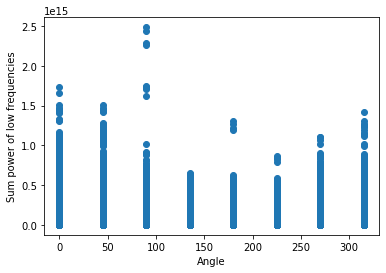

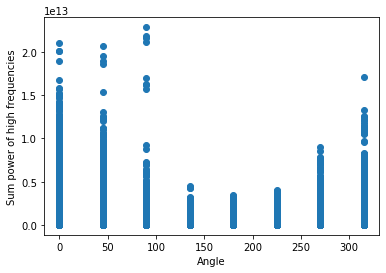

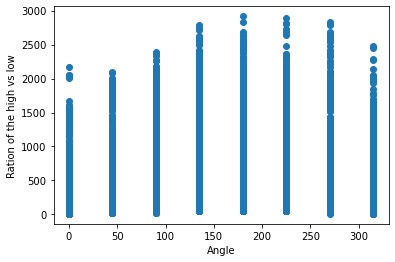

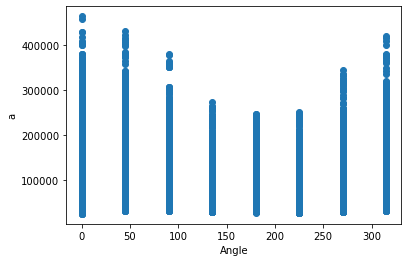

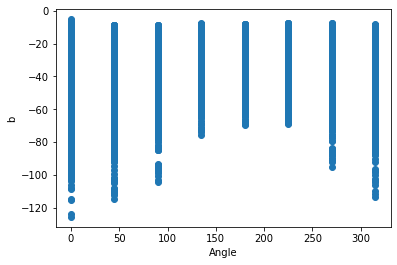

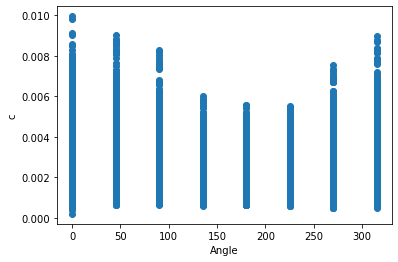

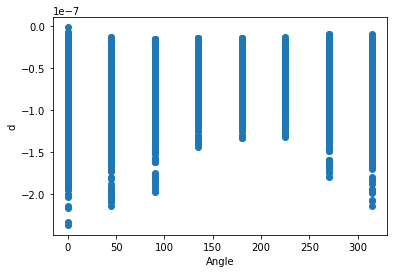

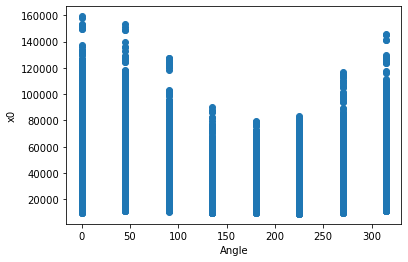

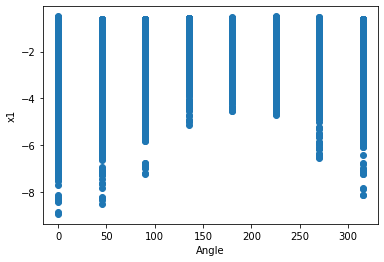

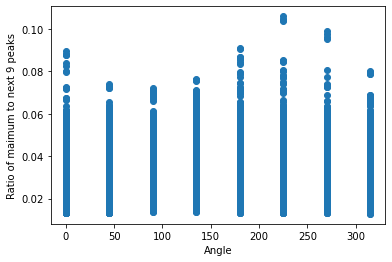

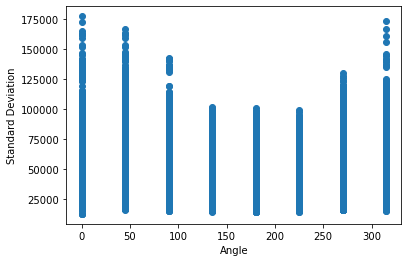

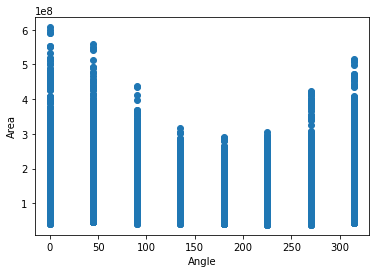

In [12]:
FeaturesLabel={0:"Sum power of low frequencies",1:"Sum power of high frequencies",2:"Ration of the high vs low",
               3:"a",4:"b",5:"c",6:"d",7:"x0",8:"x1",9:"Ratio of maimum to next 9 peaks",10:"Standard Deviation",
              11:"Area"}
for i in range(12):
    plt.figure()
    plt.scatter(Data2.iloc[:,12:],Data2.iloc[:,i:i+1])
    plt.xlabel("Angle")
    plt.ylabel(FeaturesLabel[i])
    plt.savefig(fname=FeaturesLabel[i]+'vs'+"Angle")

# K-Fold Validation and Model Fitting

In [ ]:
kf = KFold(n_splits=5)
L=[]
print(kf)
for train_index, test_index in kf.split(Data2):
 #   print(train_index,test_index)
    X_train, X_test = Data2.iloc[train_index,:12], Data2.iloc[test_index,:12]
    y_train, y_test = Data2.iloc[train_index,12:], Data2.iloc[test_index,12:]
    L_temp={}
    for k in range(10,510,50):
        models = [
          RandomForestClassifier(n_estimators=k),
          ExtraTreesClassifier(n_estimators=k),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                             n_estimators=k)]
        for model in models:
            model.fit(X_train,y_train)
            scores=model.score(X_test,y_test)
            if model not in L_temp:
                L_temp[model]=[scores]
            else:
                L_temp[model].append(scores)
    L.append(L_temp)
print(L)
            

KFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [11]:
clf = ExtraTreesClassifier(n_estimators=200, random_state=0)

In [12]:
clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=200, random_state=0)

In [13]:
clf.score(X_test,y_test)

0.828966404115094

In [14]:
clf.score(X_train,y_train)

1.0

In [20]:
pred=clf.predict(X_test)
pred=pd.DataFrame(pred)
pred=pred.values.ravel()


array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
pred=pd.Series(pred)

In [42]:
list1=y_test['new label']
pd.Series(list1)
list1

15297    1
15974    1
38047    1
32733    0
22593    1
        ..
30637    0
11093    0
20385    0
20581    0
8476     0
Name: new label, Length: 12442, dtype: int64

In [28]:
import numpy as np
def accuracy(y_hat, y):
    
    
    size=y_hat.size
    a=0
    ans=0
    while(a<size):
        if y.iat[a]==y_hat.iat[a]:
            ans+=1
        a+=1
    return (ans/size)
    

def precision(y_hat, y, cls):
    
    TP=0
    TP_FP=0
    for i in range(y.size):
        if y_hat.iat[i]==cls:
            if y_hat.iat[i]==y.iat[i]:
                TP+=1
            TP_FP+=1
    return TP/TP_FP
    

def recall(y_hat, y, cls):
   
    TP=0
    TP_TN=0
    for i in range(y.size):
        if y.iat[i]==cls:
            if y_hat.iat[i]==y.iat[i]:
                TP+=1
            TP_TN+=1
    return TP/TP_TN

    

def rmse(y_hat, y):
    
    se=0
    mse=0
    rmsef=0
    for i in range(y.size):
        se+=(y_hat.iloc[i]-y.iloc[i])**2
    mse=se/y.size
    rmsef=np.sqrt(mse)
    return rmsef

def mae(y_hat, y):
    
    ans=0
    for i in range(y_hat.size):
        ans+=abs(y_hat.iloc[i]-y.iloc[i])
    fans=0
    fans=ans/y.size
    return fans


In [47]:
pred

0        1
1        1
2        0
3        1
4        0
        ..
12437    0
12438    0
12439    0
12440    0
12441    0
Length: 12442, dtype: int64

In [51]:
list1

15297    1
15974    1
38047    1
32733    0
22593    1
        ..
30637    0
11093    0
20385    0
20581    0
8476     0
Name: new label, Length: 12442, dtype: int64

In [52]:
precision(pred, list1,1)

0.833116714322849

In [53]:
precision(pred, list1,0)

0.827108784176847

In [54]:
recall(pred,list1,0)

0.9171719778093149

In [55]:
recall(pred,list1,1)

0.6832231933489661

In [ ]:
kf = KFold(n_splits=5)
L=[]
print(kf)
for train_index, test_index in kf.split(Data2):
 #   print(train_index,test_index)
    X_train, X_test = Data2.iloc[train_index,:12], Data2.iloc[test_index,:12]
    y_train, y_test = Data2.iloc[train_index,12:], Data2.iloc[test_index,12:]
    L_temp={}
    for k in range(10,510,50):
        models = [
          RandomForestClassifier(n_estimators=k),
          ExtraTreesClassifier(n_estimators=k),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                             n_estimators=k)]
        for model in models:
            model.fit(X_train,y_train)
            scores=model.score(X_test,y_test)
            if model not in L_temp:
                L_temp[model]=[scores]
            else:
                L_temp[model].append(scores)
    L.append(L_temp)
print(L)

In [64]:
#No. of estimators vs k fold vs accuracy
kf = KFold(n_splits=5)

final=[]
for train_index, test_index in kf.split(Data2):
    X_train, X_test = Data2.iloc[train_index,:12], Data2.iloc[test_index,:12]
    y_train, y_test = Data2.iloc[train_index,13:], Data2.iloc[test_index,13:]
    l=[]
    for k in range(10,510,50):
        
        a=ExtraTreesClassifier(n_estimators=k,max_depth=None)
        a.fit(X_train,y_train)
        scores=a.score(X_test,y_test)
        l.append(scores)
    final.append(l)
print(final)


C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d arr

C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d arr

[[0.8139843279083785, 0.8329113924050633, 0.8376130198915009, 0.8391802290536468, 0.8406268836648584, 0.8420735382760699, 0.8407474382157927, 0.8413502109704641, 0.8423146473779385, 0.8414707655213984], [0.8069921639541893, 0.8339963833634719, 0.8382157926461724, 0.8385774562989753, 0.8405063291139241, 0.8401446654611212, 0.8395418927064496, 0.8386980108499096, 0.8399035563592525, 0.841711874623267], [0.8038340969375453, 0.8350614902339041, 0.835423197492163, 0.8345792138895587, 0.834338075717386, 0.8350614902339041, 0.8367494574391127, 0.8366288883530263, 0.8353026284060767, 0.836146612008681], [0.809983120327948, 0.8293947431878467, 0.835784904750422, 0.8349409211478177, 0.8355437665782494, 0.8374728719556306, 0.8356643356643356, 0.8355437665782494, 0.8381962864721485, 0.8379551482999759], [0.8014227152158186, 0.828430190499156, 0.828791897757415, 0.8303592958765372, 0.8325295394260912, 0.8303592958765372, 0.8313238485652279, 0.8327706775982638, 0.8313238485652279, 0.8326501085121775

In [ ]:
#No. of estimators vs k fold vs accuracy
kf = KFold(n_splits=4)
final2=[]

for train_index, test_index in kf.split(Data2):
    X_train, X_test = Data2.iloc[train_index,:12], Data2.iloc[test_index,:12]
    y_train, y_test = Data2.iloc[train_index,13:], Data2.iloc[test_index,13:]
    l2=[]
    y_train=y_train.values.ravel()
    y_test=y_test.values.ravel()
    
    for k in range(15,30):
        a=ExtraTreesClassifier(n_estimators=510,max_depth=k)
        a.fit(X_train,y_train)
        print("Model fitting...")
        scores=a.score(X_test,y_test)
        l2.append(scores)
    final2.append(l2)
print(final2)


Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...
Model fitting...


# Plot of No. of estimators vs k fold vs accuracy

In [ ]:
x=[10,60,110,160,210,260,310,360,410,460] #No of Estimators
for i in final:
    plt.figure()
    plt.plot(x,i)
    plt.xlabel("No. of Estimators")
    plt.ylabel("Accuracy")
    plt.show()
    plt.savefig("Kfold No."+str(i+1)+"Estimators vs Accuracy")
    

# Trials

In [55]:
model1=RandomForestClassifier(n_estimators=100,random_state=0)

In [56]:
model1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [58]:
model1.score(X_test,y_test)

0.5601189519369876

In [59]:
model2=AdaBoostClassifier(n_estimators=100,random_state=0)

In [60]:
model2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [61]:
model2.score(X_test,y_test)

0.1914483202057547